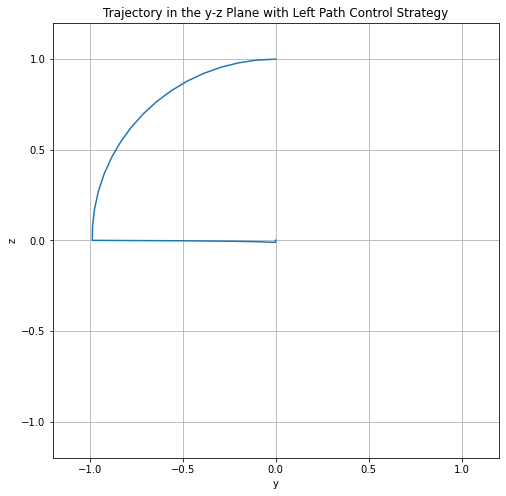

156.2548447259523

In [232]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
gamma = 1 / 23.9                                                                            #done
Gamma = 1 / 1.94                                                                            #done
if gamma != Gamma:
    z0 = -gamma / (2 * (Gamma - gamma))                                                     #done
    y_threshold = (2 * np.pi * (2 * Gamma - gamma**2)) / abs(gamma * (gamma - 2 * Gamma))

# Singular Control Function u_s(y, z)
def u_s(y):                                                                                 #done
    epsilon = 1e-6  # Small number to prevent division by zero                              #done
    numerator = -y * gamma * (Gamma - 2 * gamma) - 2 * y * z0 * (gamma**2 - Gamma**2)       #done
    denominator = 2 * (Gamma - gamma) * (y**2 - z0**2) - gamma * z0                         #done
    # Check if the denominator is too small
    if abs(denominator) < epsilon:                                                          #done
        return 0  # Return a default value (e.g., 0) to handle this case
    return numerator / (denominator + epsilon)                                              #done

# Bang Pulse Control
def bang_pulse_control(max_amplitude):
    # Apply a constant control of maximum amplitude
    return max_amplitude


def switching_function(y, z):
    # Example placeholder logic for the switching function
    # This logic should be replaced with the actual criteria described in the paper
    
    # Define a threshold for switching
    switching_threshold = ...  # Define this based on paper's criteria

    # Calculate a value based on the current state (y, z)
    # This is just an example; replace it with the actual calculation
    calculated_value = ...  # Some function of y and z

    # Return the calculated value for use in control decision
    return calculated_value - switching_threshold


def control_function(y,z):
    max_amplitude = 30
    # Condition for switching to singular control
    if z <= 0 and y < y_threshold:
        return u_s(y)
    else:
        return bang_pulse_control(max_amplitude)



# Differential Equations
def bloch_equations(t, yz):                                                                 #done
    y, z = yz                                                                               #done
    u = control_function(y,z)                                                           #done
    dydt = -Gamma * y + u * (-z)                                                            #done
    dzdt = gamma - gamma * z + u * y                                                        #done
    return [dydt, dzdt]                                                                     #done

# Initial Conditions and Time Span
initial_conditions = [0, 1]  # y = 0, z = 1                                                 #done
t_span = [0, 10]  # Adjust the end time as needed
t_eval = np.linspace(t_span[0], t_span[1], 3000)                                            #done

# Solve the Differential Equations
solution = solve_ivp(bloch_equations, t_span, initial_conditions, t_eval=t_eval)            #done

# Plot the Results
plt.figure(figsize=(8, 8))  # Width, height in inches (adjust as needed)
plt.plot(solution.y[0], solution.y[1])
plt.xlabel('y')
plt.ylabel('z')
plt.title('Trajectory in the y-z Plane with Left Path Control Strategy')
plt.grid(True)
plt.xlim(-1.2, 1.2)  # Set x-axis limits
plt.ylim(-1.2, 1.2)  # Set y-axis limits
plt.show()

y_threshold


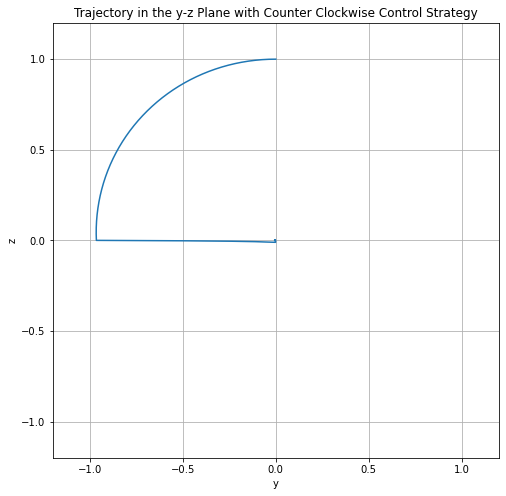

In [233]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
Gamma = 1 / 1.94
gamma = 1 / 23.9
switching_threshold = 1e-6  # This is a small threshold for numerical stability
if gamma != Gamma:
    z0 = -gamma / (2 * (Gamma - gamma))                                                   
    y_threshold = (2 * np.pi * (2 * Gamma - gamma**2)) / abs(gamma * (gamma - 2 * Gamma))

# Define the vector fields F0, F1, and V
def F0(y, z):
    return np.array([-Gamma * y, gamma - gamma * z])

def F1(y, z):
    return np.array([-z, y])

def V(y, z):
    return np.array([-gamma + gamma * z - Gamma * z, -Gamma * y + gamma * y])

# Define the switching function Phi and its derivative
def switching_function(P, y, z):
    #print(-P[1] * z + P[0] * y)
    return -P[1] * z + P[0] * y

def derivative_switching_function(P, y, z):
    V_val = V(y, z)
    print(np.dot(P,V_val))
    return np.dot(P, V_val)

# Define the singular control function u_s (placeholder, to be defined based on higher-order conditions)
# Singular Control Function u_s(y, z)
def u_s(y):                                                                                 #done
    epsilon = 1e-6  # Small number to prevent division by zero                              #done
    numerator = -y * gamma * (Gamma - 2 * gamma) - 2 * y * z0 * (gamma**2 - Gamma**2)       #done
    denominator = 2 * (Gamma - gamma) * (y**2 - z0**2) - gamma * z0                         #done
    # Check if the denominator is too small
    if abs(denominator) < epsilon:                                                          #done
        return 0  # Return a default value (e.g., 0) to handle this case
    return numerator / (denominator + epsilon)                                              #done


# Bang Pulse Control
def bang_pulse_control():
    # Apply a constant control of maximum amplitude
    return 2 * np.pi**1.5

# Control function that uses the switching function to determine the control mode
def control_function(P, y, z):
    if switching_function(P, y, z) < switching_threshold and derivative_switching_function(P, y, z) == switching_threshold:
        # Apply singular control
        return u_s(y)
    else:
        # Apply bang-bang control
        return bang_pulse_control()

# Define the combined system of differential equations
def bloch_equations(t, yzP):
    dF0_dy = -Gamma
    dF0_dz = -gamma
    dF1_dy = 1
    dF1_dz = -1
    y, z, Py, Pz = yzP
    P = np.array([Py, Pz])
    u = control_function(P, y, z)

    # F0_val = F0(y, z)  # Uncontrolled dynamics
    # F1_val = F1(y, z)  # Control influenced dynamics

    # Hamiltonian's partial derivatives
    dH_dy = -(Py * dF0_dy + Pz * dF0_dz + u * (Py * dF1_dy + Pz * dF1_dz))
    dH_dz = -(Py * dF0_dz + Pz * dF0_dz + u * (Py * dF1_dz + Pz * dF1_dz))

    # Adjoint equations
    dPydt = -dH_dy
    dPzdt = -dH_dz

    dydt, dzdt = F0(y, z) + u * F1(y, z)
    return [dydt, dzdt, dPydt, dPzdt]

# Initial conditions for y, z, Py, Pz
initial_conditions = [0, 1, 0.00001, 0.00001]  # Modify as needed

# Time span for the simulation
t_span = [0, 10]  # Modify as needed
t_eval = np.linspace(t_span[0], t_span[1], 3000)

# Solve the differential equations
solution = solve_ivp(bloch_equations, t_span, initial_conditions, t_eval=t_eval)

# Plot the Results
plt.figure(figsize=(8, 8))
plt.plot(solution.y[0], solution.y[1])
plt.xlabel('y')
plt.ylabel('z')
plt.title('Trajectory in the y-z Plane with Counter Clockwise Control Strategy')
plt.grid(True)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.show()


In [234]:
solution.y[0],solution.y[1]

(array([ 0.        , -0.03709415, -0.07407349, ..., -0.00363475,
        -0.00363354, -0.0036325 ]),
 array([1.00000000e+00, 9.99311018e-01, 9.97246728e-01, ...,
        1.33268208e-04, 1.37815590e-04, 1.42403198e-04]))